In [27]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import sys
from astropy import wcs
from astropy.coordinates import SkyCoord

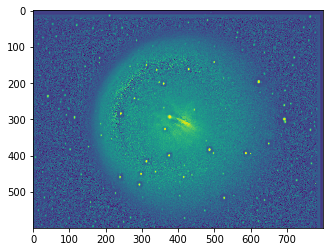

In [19]:
#reading in some jpeg images
im1 = plt.imread('../Data_CometHolmes/holmes-0001.jpg')
plt.imshow(im1)

In [ ]:
(['altaz', 'barycentricmeanecliptic', 'barycentrictrueecliptic', 'cirs', 'custombarycentricecliptic', 'fk4', 
  'fk4noeterms', 'fk5', 'galactic', 'galacticlsr', 'galactocentric', 'gcrs', 'geocentricmeanecliptic', 
  'geocentrictrueecliptic', 'hcrs', 'heliocentriceclipticiau76', 'heliocentricmeanecliptic', 
  'heliocentrictrueecliptic', 'icrs', 'itrs', 'lsr', 'precessedgeocentric', 'supergalactic'])


In [150]:
spot_test = SkyCoord(56.6,50.65,unit="deg")
spot_test

<SkyCoord (ICRS): (ra, dec) in deg
    (56.6, 50.65)>

In [132]:
test_pt = SkyCoord.from_pixel(600,800,world_coord,origin=0,mode='wcs')
test_pt

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (56.19955107, 50.48333262)>

In [131]:
image_array.shape

(600, 800)

Footprint:  [[58.19310082 50.11465347]
 [58.23461817 50.29045975]
 [58.02824836 50.31023626]
 [57.98747289 50.13435759]]
False


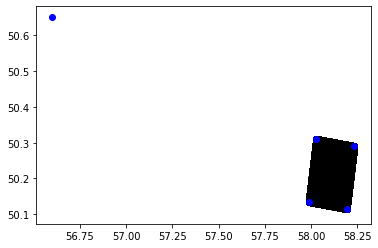

In [161]:
num_param = '0045'

image_array = plt.imread('../Data_CometHolmes/holmes-%s.jpg'%(num_param))
image_shape = np.ones(image_array.shape[:2])
world_coord = wcs.WCS('../Data_CometHolmes/holmes-%s.wcs'%(num_param))

#plt.imshow(image_array)
pixel_coords = np.ones((len(image_array)*len(image_array[0]), 2))
#loop through the array and make pixel coords at each point, might have to flip axes

foot_print = world_coord.calc_footprint(axes = [len(image_array),len(image_array[0])])
print("Footprint: ", foot_print)

print(spot_test.contained_by(world_coord, image = image_shape)) #how does the footprint work?
##CHOOSE COORDINATE SYSTEM THAT IS CORRECT, MIGHT BE LITTLE ERRORS IN THE CONTAINED_BY METHOD

##HOW TO DO SUBIMAGE DESCRIBED IN THE PAPER???

##LOOK AT SUBIMAGE DOCUMENTATION, try specifying image dimension in footprint_contains

for i in range(len(image_array)):
    for j in range(len(image_array[0])):
        index = i*len(image_array[0]) + j
        pixel_coords[index][0] = i
        pixel_coords[index][1] = j

trans_coords = np.transpose(world_coord.wcs_pix2world(pixel_coords, 0))
plt.scatter(trans_coords[0], trans_coords[1], color='k');
plt.scatter(np.transpose(foot_print)[0], np.transpose(foot_print)[1],color='b')
plt.scatter([56.6],[50.65],color='b')

In [40]:
#the above result are the corners, starting with the bottom left and going clockwise, 
#points are in format (ra, dec)

False


False


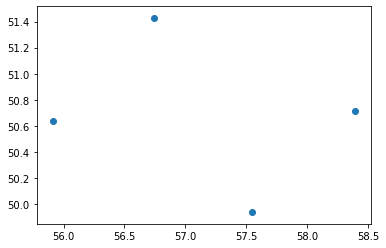

In [9]:
#use this command to extract the information you need to define a RA and DEC rectangle in the sky
!/usr/local/astrometry/bin/wcsinfo ../Data_CometHolmes/holmes-0001.wcs

crpix0 541.409561157
crpix1 271.699447632
crval0 56.5092966055
crval1 50.4733381632
ra_tangent 56.5092966055
dec_tangent 50.4733381632
pixx_tangent 541.409561157
pixy_tangent 271.699447632
imagew 800
imageh 600
cd11 -6.08099991846e-05
cd12 -0.000365517143177
cd21 -0.000365517143177
cd22 6.08099991846e-05
det -1.37300637957e-07
parity -1
pixscale 1.33394762563
orientation -80.554383
ra_center 56.5062160284
dec_center 50.526594329
orientation_center -80.556759
ra_center_h 3
ra_center_m 46
ra_center_s 1.49184680927
dec_center_sign 1
dec_center_d 50
dec_center_m 31
dec_center_s 35.7395845069
ra_center_hms 03:46:01.492
dec_center_dms +50:31:35.740
ra_center_merc 0.15696171
dec_center_merc 0.66314347
fieldarea 0.0659043
fieldw 17.79
fieldh 13.34
fieldunits arcminutes
decmin 50.3621
decmax 50.691
ramin 56.296
ramax 56.7175
ra_min_merc 0.157549
ra_max_merc 0.156378
dec_min_merc 0.663863
dec_max_merc 0.662426
merc_diff 0.00143709
merczoom 10


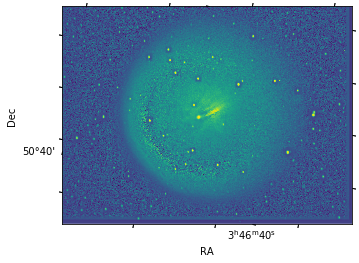

In [116]:
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
import astropy.units as u

#filename = get_pkg_data_filename('../Data_CometHolmes/holmes-0010.wcs')

#hdu = fits.open(filename)[0]
wcs = WCS('../Data_CometHolmes/holmes-0001.wcs')
test_im = plt.imread('../Data_CometHolmes/holmes-0001.jpg')
fig = plt.figure()
fig.add_subplot(111, projection=wcs)
plt.imshow(test_im, origin='lower', cmap=plt.cm.viridis)
plt.xlabel('RA')
plt.ylabel('Dec')
#plt.xlim([0,1000])
#plt.ylim([0,800]);